In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [3]:
# Function to download data
def download_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

p

In [4]:
# Function to decompose time series
def plot_comparison(data, tickers):
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(data[ticker], label=ticker)
    plt.title("Adjusted Closing Price Comparison of AAPL and GOOGL")
    plt.xlabel("Date")
    plt.ylabel("Adjusted Closing Price")
    plt.legend()
    plt.show()

In [5]:
# Function to decompose time series and extract trends
def extract_trends(data):
    trends = {}
    for ticker in data.columns:
        decomposition = seasonal_decompose(data[ticker], model='additive', period=365)
        trends[ticker] = decomposition.trend
    return trends

In [6]:
def plot_trends(trends, tickers):
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(trends[ticker], label=ticker)
    plt.title("Trend Comparison of AAPL and GOOGL")
    plt.xlabel("Date")
    plt.ylabel("Trend")
    plt.legend()
    plt.show()

The **KPSS (Kwiatkowski-Phillips-Schmidt-Shin)** test is a statistical test used to check for stationarity in a time series.

**Key Concepts**:
*   **Null Hypothesis (H₀)**: The series is stationary (either level or trend stationary).
*   **Alternative Hypothesis (H₁)**: The series is non-stationary.

The test calculates the KPSS test statistic, which measures the variance of the residuals from a regression of the time series on a constant or a constant plus a time trend.

*   If the test statistic is small, fail to reject the null hypothesis, meaning the series is likely stationary.
*   If the test statistic is large, reject the null hypothesis, meaning the series is likely non-stationary.





In [7]:
# Function to plot rolling statistics
def plot_rolling_statistics(data):
    rolling_means = data.rolling(window=12).mean()
    rolling_stds = data.rolling(window=12).std()

    for ticker in data.columns:
        plt.figure(figsize=(12, 6))
        plt.plot(data[ticker], label='Original')
        plt.plot(rolling_means[ticker], color='red', label='Rolling Mean')
        plt.plot(rolling_stds[ticker], color='black', label='Rolling Std')
        plt.legend()
        plt.title(f'Rolling Mean & Standard Deviation of {ticker}')
        plt.show()

In [8]:
def kpss_test(series, title=''):
    statistic, p_value, lags, critical_values = kpss(series, regression='c')
    print(f'KPSS Test: {title}')
    print(f'Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Lags: {lags}')
    for key, value in critical_values.items():
        print(f'Critical Value {key}: {value}')
    if p_value < 0.05:
        print("Reject the null hypothesis - the series is not stationary")
    else:
        print("Fail to reject the null hypothesis - the series is stationary")

In [9]:
# Function to difference the data
def difference_data(data):
    differenced_data = data.diff().dropna()
    return differenced_data

In [10]:
if __name__ == "__main__":
    tickers = ['AAPL',  'GOOGL']
    start_date = '2010-01-01'
    end_date = '2023-01-01'

In [11]:
data = download_data(tickers, start_date, end_date)

[*********************100%***********************]  2 of 2 completed


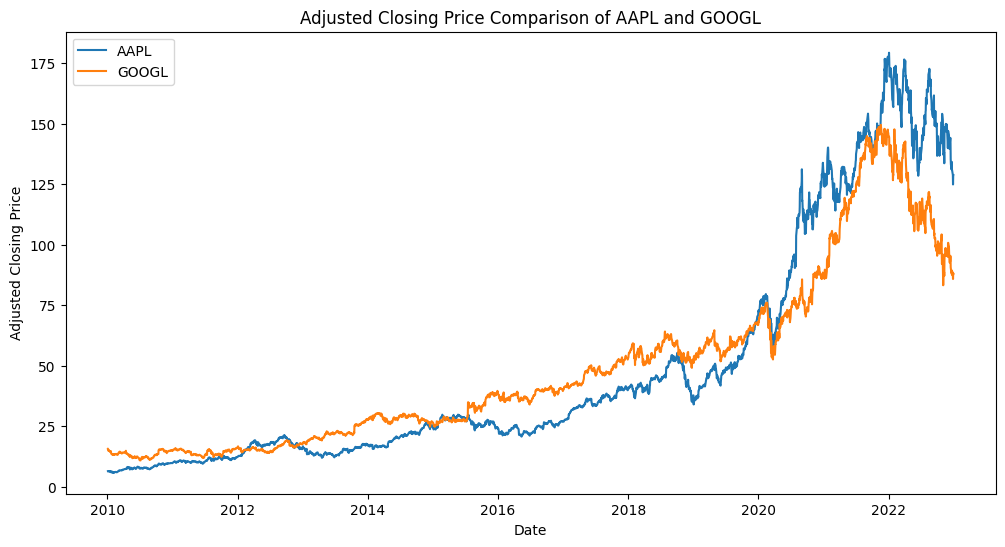

In [12]:
plot_comparison(data, tickers)

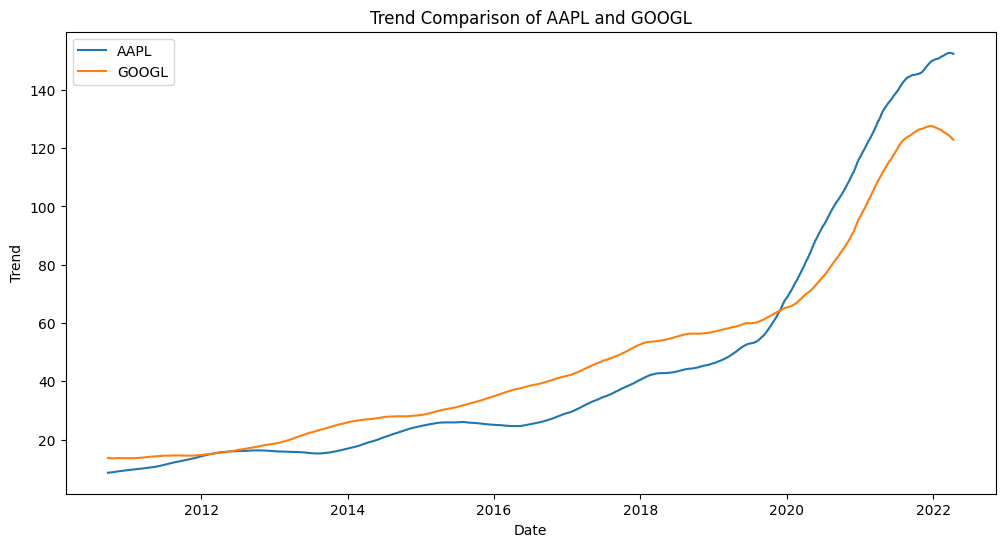

In [13]:
trends = extract_trends(data)
plot_trends(trends, tickers)

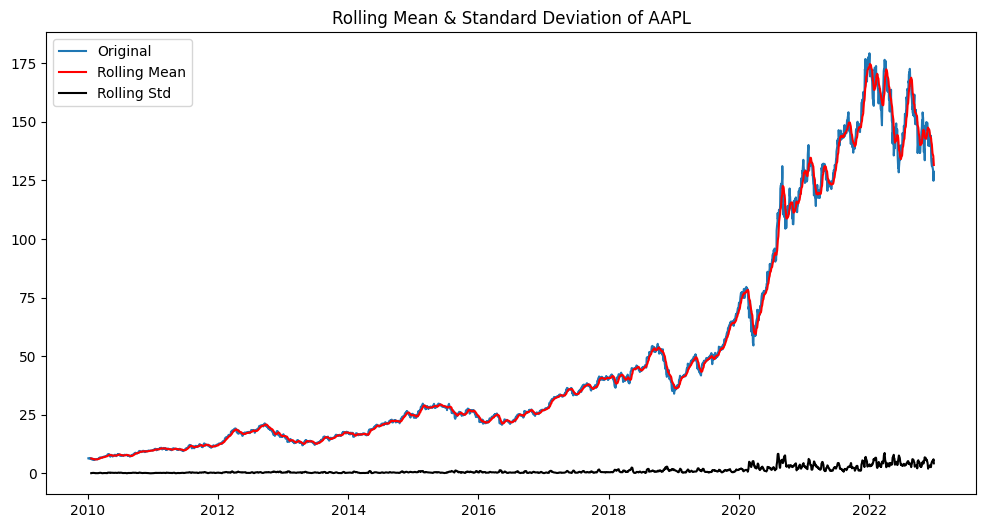

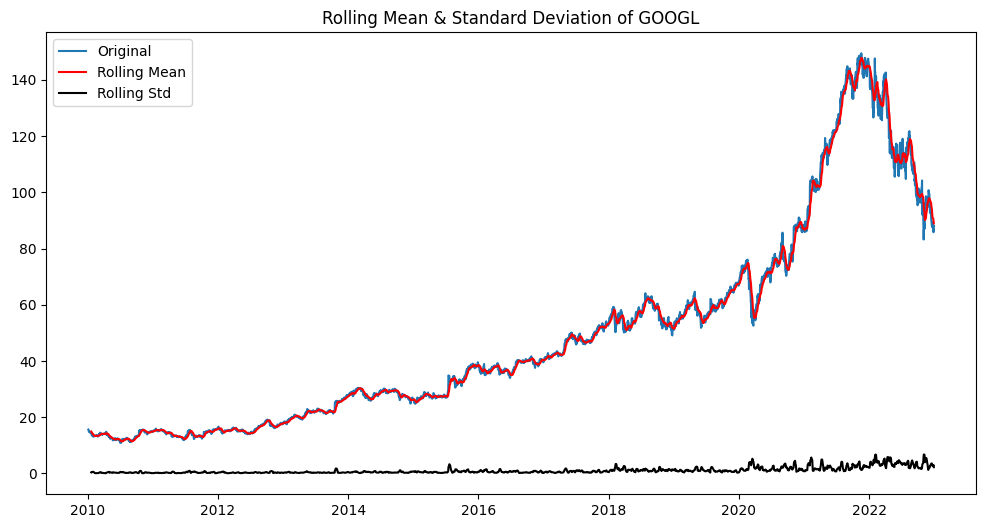

In [14]:
plot_rolling_statistics(data)

In [15]:
for ticker in data.columns:
        kpss_result = kpss_test(data[ticker])
        print(f"KPSS test result for {ticker}: {kpss_result}")


KPSS Test: 
Statistic: 6.655584837740872
p-value: 0.01
Lags: 37
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739
Reject the null hypothesis - the series is not stationary
KPSS test result for AAPL: None
KPSS Test: 
Statistic: 7.235796186029859
p-value: 0.01
Lags: 37
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739
Reject the null hypothesis - the series is not stationary
KPSS test result for GOOGL: None


<ipython-input-8-96bb5c8b8de1>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')
<ipython-input-8-96bb5c8b8de1>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(series, regression='c')


The **Engle-Granger test** is used to determine whether two or more time series are cointegrated. Cointegration implies that even though individual time series might be non-stationary (i.e., have trends), a linear combination of them is stationary. This is crucial in econometrics because it suggests a long-term equilibrium relationship between the series.

**Test for Stationarity of Individual Series**
Before applying the Engle-Granger test, we need to check whether each time series is non-stationary. We typically use a unit root test like the Augmented Dickey-Fuller (ADF) test or KPSS test for this.


*   Null Hypothesis (H₀) of ADF test: The time series has a unit root (i.e., it is non-stationary).
*   If ADF indicates non-stationarity for both series, we can proceed.

**Estimate the Long-Run Relationship (Linear Regression)**
If both series are non-stationary, perform an ordinary least squares (OLS) regression to estimate the long-run relationship between the variables. For example, assume we have two non-stationary series,X_t and Y_t  and we want to check for cointegration:
Yt = α + βX_t + ϵ_t
Here, ϵ_t epresents the residuals, which are the differences between the actual and predicted values of Y_t.

**Test the Residuals for Stationarity**
Next, apply a unit root test (like ADF test) to the residuals ϵ_t from the regression.


*   Null Hypothesis (H₀) of the unit root test: The residuals ϵ_t have a unit root (i.e., they are non-stationary).
*   Alternative Hypothesis: The residuals are stationary (i.e., they don't have a unit root).

If the residuals are stationary (i.e., no unit root), then X_t and Y_t are cointegrated.

**Result Interpretation**

*   **If the residuals are stationary**: You reject the null hypothesis, meaning the series are cointegrated and have a long-run equilibrium relationship.
*   **If the residuals are non-stationary**: You fail to reject the null hypothesis, meaning there is no cointegration, and the series do not have a long-run equilibrium relationship.


In [16]:
# Function to perform Engle-Granger Two-Step Procedure
def engle_granger_test(y, x):
    # Step 1: Run OLS regression
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    print(model.summary())

    # Step 2: Perform ADF test on residuals
    residuals = model.resid
    adf_test = adfuller(residuals)

    return adf_test, residuals

In [17]:
def plot_residuals(residuals):
    plt.figure(figsize=(12, 6))
    plt.plot(residuals, label='Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals from OLS Regression')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()

In [18]:
y = data['AAPL']
x = data['GOOGL']

In [19]:
adf_test, residuals = engle_granger_test(y, x)

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 4.451e+04
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:18:01   Log-Likelihood:                -12879.
No. Observations:                3272   AIC:                         2.576e+04
Df Residuals:                    3270   BIC:                         2.577e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7786      0.368    -37.426      0.0

In [20]:
for key, value in adf_test[4].items():
        print(f'Critical Value ({key}): {value}')

Critical Value (1%): -3.43236616722938
Critical Value (5%): -2.8624308219885193
Critical Value (10%): -2.567244203750082


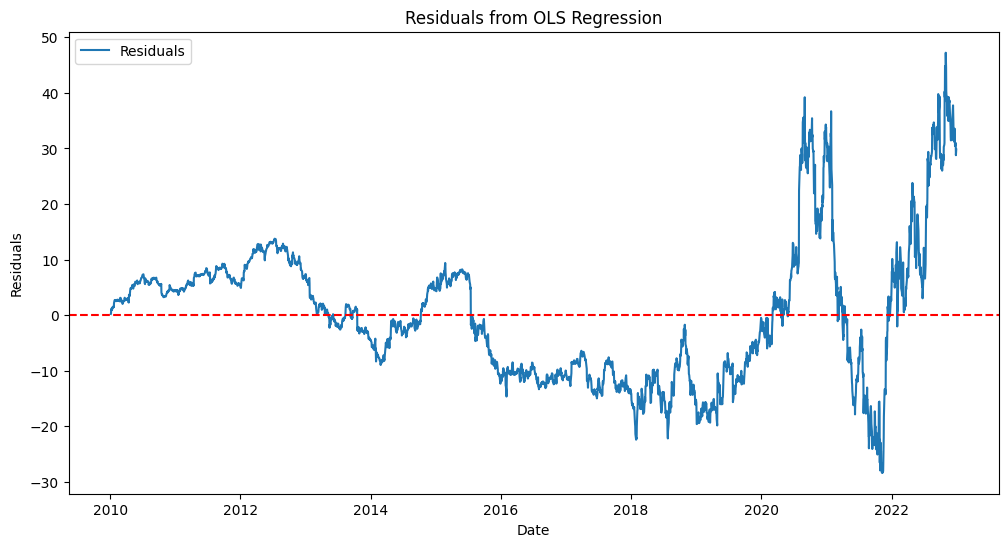

In [21]:
plot_residuals(residuals)

In [22]:
# Function to build and run ECM
def build_ecm(y, x, residuals):
    # Create DataFrame of differenced series and lagged residuals
    df = pd.DataFrame({
        'dy': y.diff().dropna(),
        'dx': x.diff().dropna(),
        'residuals_lagged': residuals.shift(1).dropna()
    }).dropna()

    # Run OLS regression on differenced data with lagged residuals as explanatory variable
    ecm_model = sm.OLS(df['dy'], sm.add_constant(df[['dx', 'residuals_lagged']])).fit()
    print(ecm_model.summary())

    return ecm_model

In [23]:
ecm_model = build_ecm(y, x, residuals)

                            OLS Regression Results                            
Dep. Variable:                     dy   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     1333.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:18:02   Log-Likelihood:                -4710.6
No. Observations:                3271   AIC:                             9427.
Df Residuals:                    3268   BIC:                             9446.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0193      0.018  

In [24]:
# Check if residuals are stationary
if adf_test[1] < 0.05:
    print("Residuals are stationary. Proceeding to build ECM.")

    # Build and run ECM
    ecm_model = build_ecm(y, x, residuals)
else:
    print("Residuals are not stationary. No cointegration detected.")

print("Process completed.")

Residuals are not stationary. No cointegration detected.
Process completed.


The **Johansen Trace Test** is a multivariate statistical test used to determine the number of cointegrating relationships among multiple non-stationary time series. It is an extension of the Engle-Granger test when you have more than two time series.

*   **Test for Stationarity of Individual Series**
Before applying the Johansen test, ensure that each of the time series is non-stationary. This can be done using a unit root test like the ADF test or KPSS test.
*   **Set Up the Vector Error Correction Model (VECM)**
The Johansen test is based on a **Vector Error Correction Model** (VECM). The VECM is a type of Vector Autoregressive (VAR) model that is used when the variables are non-stationary but are cointegrated.

*   **Choose the Lag Length**
We must choose an appropriate lag length (k) for the VECM. This can be done using selection criteria like the Akaike Information Criterion (AIC).
*   **Perform the Johansen Trace Test**
The Johansen Trace Test works by estimating the eigenvalues of matrix Π and then testing for the number of significant cointegrating relationships.
**Hypotheses** :
**Null Hypothesis (H₀)**: The number of cointegrating relationships is less than or equal to r.
**Alternative Hypothesis (H₁)**: The number of cointegrating relationships is greater than r

Test for various values of r (from 0 to n-1) to determine how many cointegrating relationships exist.






In [25]:
# Function to run Johansen Trace Test
def johansen_test(data, det_order, k_ar_diff):
    jtest = coint_johansen(data, det_order, k_ar_diff)
    print(f"Eigenvalues of VECM coefficient matrix : {jtest.eig}\n")

    result_df = pd.DataFrame(
        {
            "Test statistic": jtest.lr1,
            "Critical values (90%)": jtest.cvt[:, 0],
            "Critical values (95%)": jtest.cvt[:, 1],
            "Critical values (99%)": jtest.cvt[:, 2],
        },
        index=[f"rank<={i}" for i in range(len(jtest.lr1))],
    )

    return result_df # This line was indented one level too deep


In [26]:
vecm_data = data.dropna()

In [27]:
print("Running Johansen Trace Test...")
jtest_result = johansen_test(vecm_data, det_order=0, k_ar_diff=1)

Running Johansen Trace Test...
Eigenvalues of VECM coefficient matrix : [0.00299957 0.00032452]



In [28]:
print(jtest_result)

         Test statistic  Critical values (90%)  Critical values (95%)  \
rank<=0       10.884677                13.4294                15.4943   
rank<=1        1.061337                 2.7055                 3.8415   

         Critical values (99%)  
rank<=0                19.9349  
rank<=1                 6.6349  


In [29]:
vecm_model = VECM(endog=vecm_data, k_ar_diff=1, deterministic="ci").fit()
print(vecm_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Det. terms outside the coint. relation & lagged endog. parameters for equation AAPL
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.AAPL       -0.0379      0.023     -1.615      0.106      -0.084       0.008
L1.GOOGL      -0.0336      0.029     -1.169      0.242      -0.090       0.023
Det. terms outside the coint. relation & lagged endog. parameters for equation GOOGL
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.AAPL       -0.0295      0.019     -1.534      0.125      -0.067       0.008
L1.GOOGL      -0.0356      0.024     -1.512      0.131      -0.082       0.011
                Loading coefficients (alpha) for equation AAPL                
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------